## Dataset Overview — Telco Customer Churn

This project uses the **Telco Customer Churn dataset**, which contains customer-level information from a telecom company. The goal is to analyze what factors influence a customer's decision to leave the service (**churn**) and build a machine-learning model that can predict churn.

The dataset includes:
- Customer demographics  
- Contract and service details  
- Billing and payment history  
- Monthly and total charges  
- Churn status (Yes/No)

**Target Variable:**  
- Churn — Indicates whether the customer left the company.

The dataset is widely used for churn prediction because it offers a clear mix of categorical and numerical features, making it ideal for EDA, feature engineering, modeling, and business interpretation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

From above we get to know:

Dataset Shape
Rows: 7043 customers
Columns: 21 features

Missing Values
No missing values except TotalCharges sometimes needs conversion (we will handle this later).

Duplicate Records
No duplicates found.

Churn Distribution
Churn = No: 5174 customers
Churn = Yes: 1869 customers

## Data Cleaning

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()

np.int64(11)

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df = df.drop_duplicates()
df.shape

(7032, 21)

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Cleaning Summary

The Telco Customer Churn dataset required minimal but essential cleaning:

Fixed incorrect datatypes
1. Total Charges was stored as text → converted to numeric.
2. 11 invalid rows were detected and removed.
3. Handled missing values
4. Only 11 rows had missing TotalCharges, safely dropped.
5. Removed duplicates
6. No duplicates found, but check included for completeness.
7. Stripped whitespace
8. Ensures clean categorical values.

# Eda

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

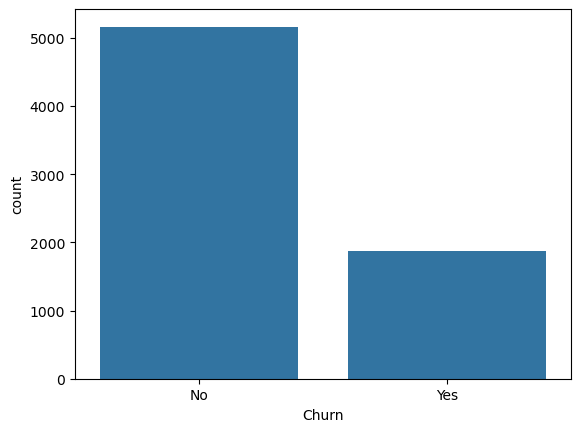

In [17]:
sns.countplot(x = df["Churn"])

The dataset shows a clear imbalance in the target variable:
1. 5,000 customers did not churn,
2. 1,800 customers churned

<Axes: xlabel='tenure', ylabel='Count'>

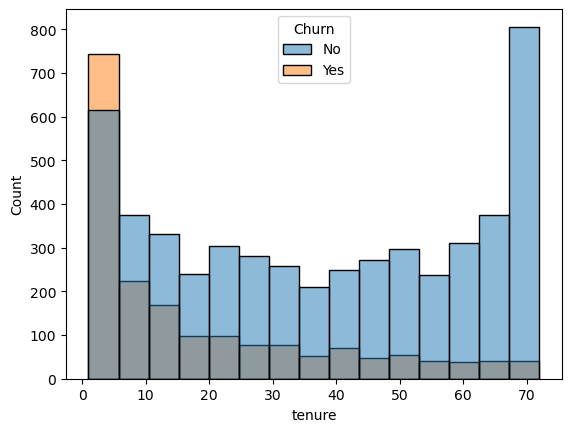

In [18]:
sns.histplot(x = "tenure" , data=df,hue="Churn")

Customers with very low tenure (1–10 months) have a significantly higher churn rate.
As tenure increases, churn steadily decreases.

This suggests that new customers are at the highest risk, likely because they have not yet built trust or satisfaction with the service.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

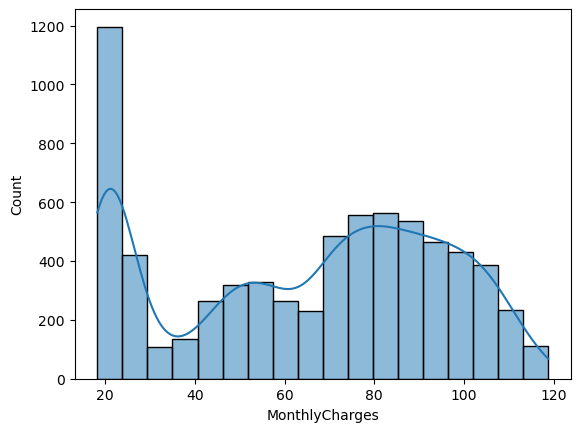

In [19]:
sns.histplot(x = "MonthlyCharges",kde=True,data=df)

Most customers pay around $20–$40, while only a small number pay above 100.

This may indicate that premium/high-priced plans are chosen by a limited.

<Axes: xlabel='Contract', ylabel='count'>

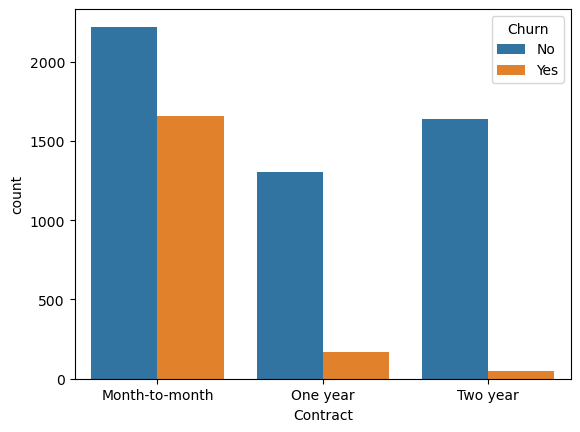

In [20]:
sns.countplot(x = "Contract",data=df,hue="Churn")

1. Customers with Month-to-Month contracts churn at the highest rate.
2. Meanwhile, 1-year and 2-year contract customers churn far less.

This makes sense: longer contracts usually indicate stronger commitment reducing churn.

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='InternetService', ylabel='count'>

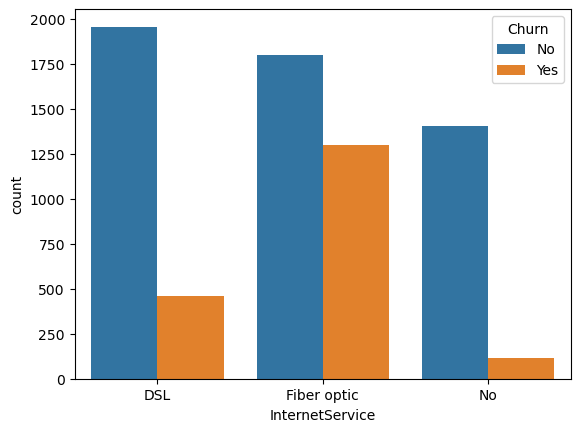

In [22]:
sns.countplot(x = "InternetService",data=df,hue="Churn")

1. Customers using Fiber Optic service show the highest churn rate.
2. Those with No Internet Service churn the least.

Fiber Optic users might be experiencing service issues or premium charges, while customers without internet service may churn less because they use fewer services.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

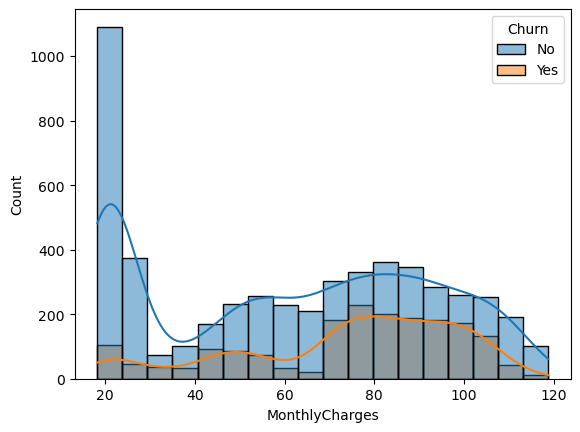

In [23]:
sns.histplot(x = "MonthlyCharges",kde=True,data=df,hue="Churn")

1. Customers paying mid-range Monthly Charges (70–100) show the highest churn.
2. On the other hand, customers paying very low (20–30) or very high (100–120) charges churn much less.
3. This suggests price-sensitive mid-tier users are most likely to leave, while premium and low-cost users are more stable.

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='TotalCharges', ylabel='Count'>

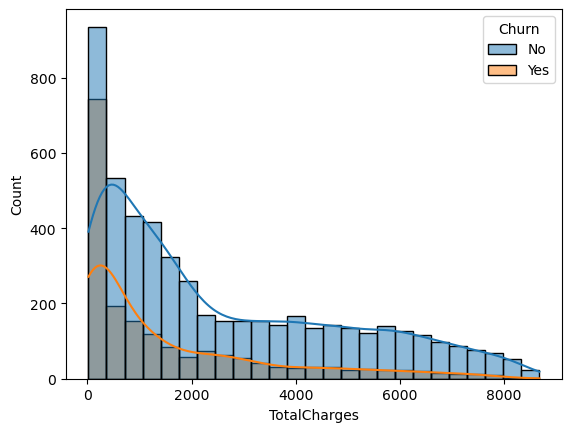

In [25]:
sns.histplot(x = "TotalCharges",kde=True,data=df,hue="Churn")

1. Customers with low Total Charges (meaning they’ve been with the company for a short time) churn significantly more.
2. High Total Charges correspond to longer customer lifetime, and these users show very low churn.

Loyal, long-term customers rarely leave once they’ve built trust.

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

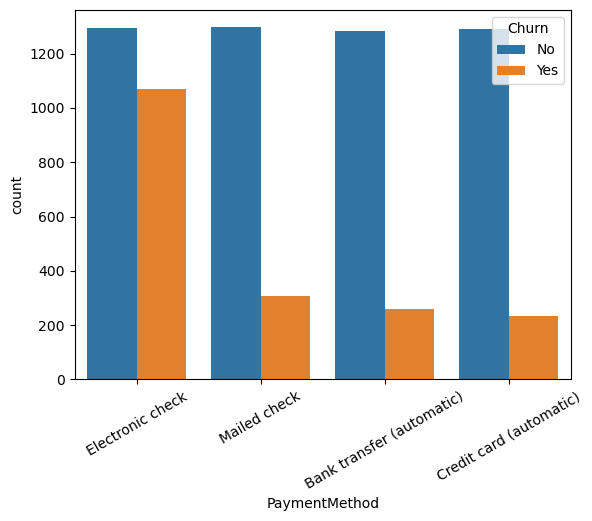

In [26]:
sns.countplot(x = "PaymentMethod",data=df,hue="Churn")
plt.xticks(rotation=30)

Customers using Electronic Check show the highest churn among all payment methods.\

Users on automatic payments (Credit Card / Bank Transfer AutoPay) churn much less, likely because auto-pay removes friction and increases stickiness.

<Axes: xlabel='SeniorCitizen', ylabel='count'>

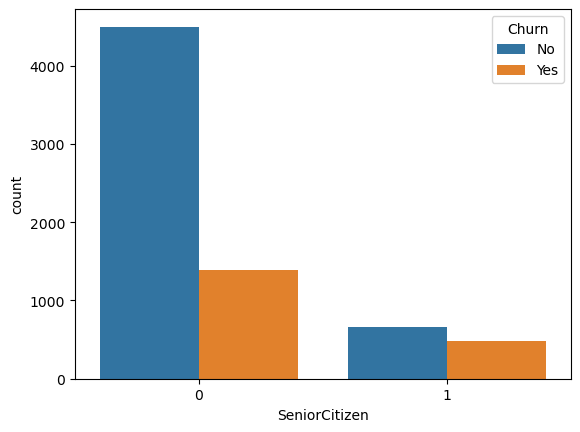

In [27]:
sns.countplot(x = "SeniorCitizen",data=df,hue="Churn")

Senior citizens represent a smaller portion of the customer base, but their churn rate is significantly higher than non-senior customers

<Axes: xlabel='TechSupport', ylabel='count'>

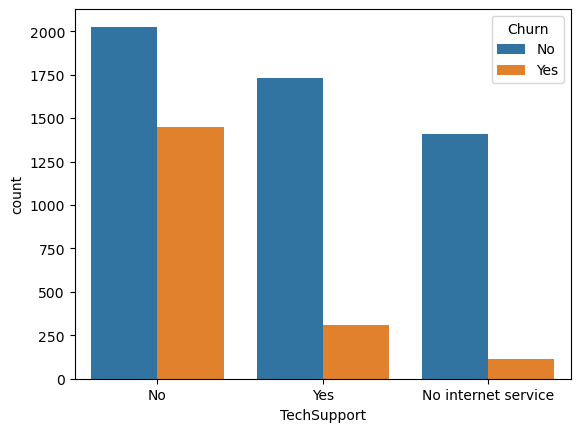

In [28]:
sns.countplot(x = "TechSupport",data=df,hue="Churn")

1. Customers without technical support churn very heavily, showing poor service experience drives them away.
2. Customers with tech support churn very little.

“No Internet Service” customers also churn very little, likely because they subscribe only to phone/TV plans and are less affected by tech issues.

<Axes: xlabel='OnlineSecurity', ylabel='count'>

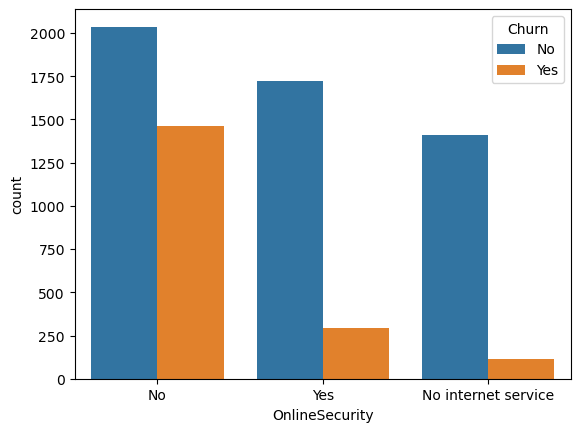

In [29]:
sns.countplot(x = "OnlineSecurity",data=df,hue="Churn")

1. Customers who have online security enabled churn significantly less.
2. Customers with no online security show a high churn rate, indicating dissatisfaction or lack of perceived protection.
3. Interestingly, customers with no internet service show extremely low churn, which is expected since they are not part of internet plans.

In [30]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='OnlineBackup', ylabel='count'>

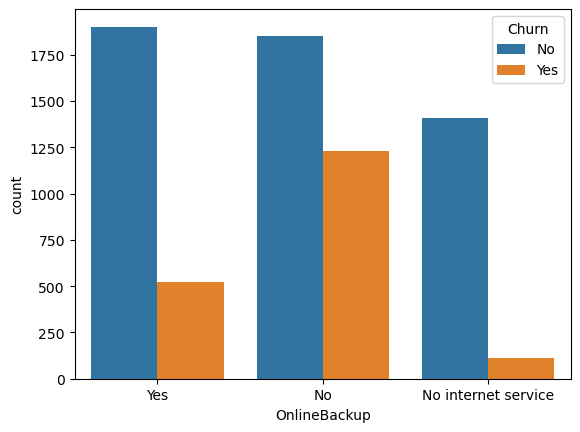

In [31]:
sns.countplot(x = "OnlineBackup",data=df,hue="Churn")

Customers with no online backup churn more compared to those who have backup services.

Those with backup or no internet service show notably lower churn rates, suggesting these groups are more stable or satisfied with their plans.

<Axes: xlabel='DeviceProtection', ylabel='count'>

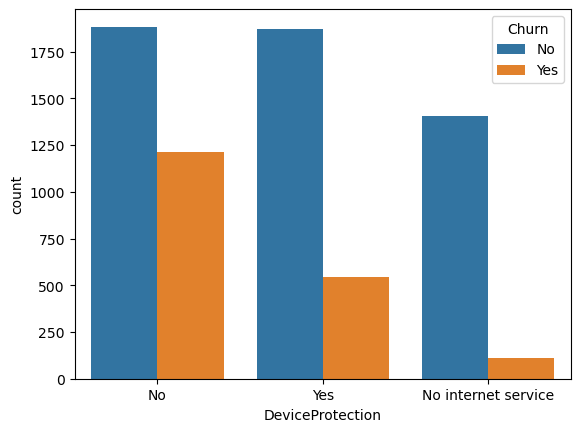

In [32]:
sns.countplot(x = "DeviceProtection",data=df,hue="Churn")

Customers without device protection have a higher likelihood of churning.

Both customers who have device protection and those with no internet service exhibit low churn rates, reinforcing the idea that added protection services increase retention.

In [33]:
df['tenure_group'] = pd.cut(df['tenure'], 
                            bins=[0, 12, 24, 36, 48, 60, 72], 
                            labels=['0-12','13-24','25-36','37-48','49-60','61-72'])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12


<Axes: xlabel='tenure_group', ylabel='count'>

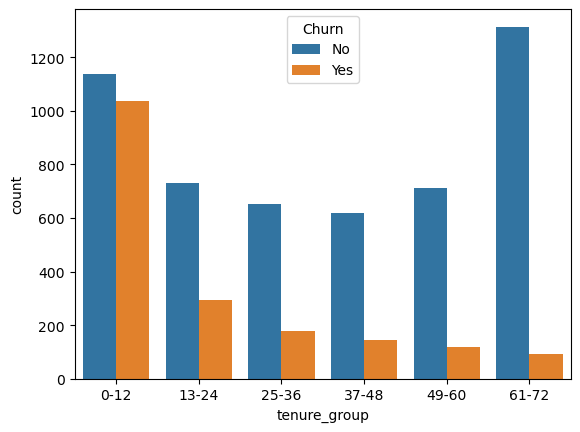

In [34]:
sns.countplot(data=df, x='tenure_group', hue='Churn')

1. Churn is extremely high among customers in their first 1–12 months.
2. After around 25 months, churn drops significantly, showing strong customer loyalty beyond the early stage.
3. This indicates the first-year experience plays a major role in whether a customer stays or leaves.

<Axes: xlabel='MultipleLines', ylabel='count'>

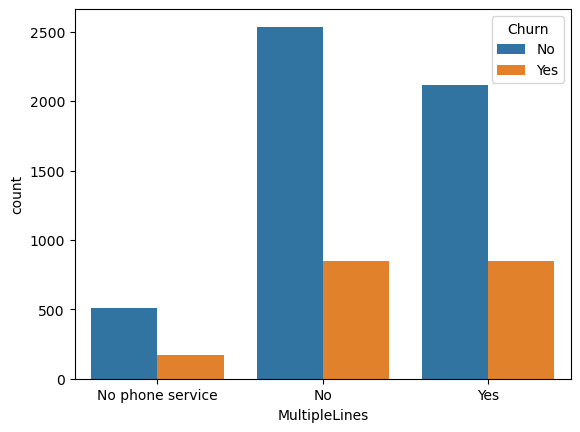

In [35]:
sns.countplot(data=df, x='MultipleLines', hue='Churn')

Customers who have multiple lines and those with no multiple lines show almost the same churn rate, meaning this feature does not strongly influence churn.

However, customers with “No Internet Service” category under this feature show very low churn, again indicating that internet-based service categories generally have different behavior from non-internet customers.

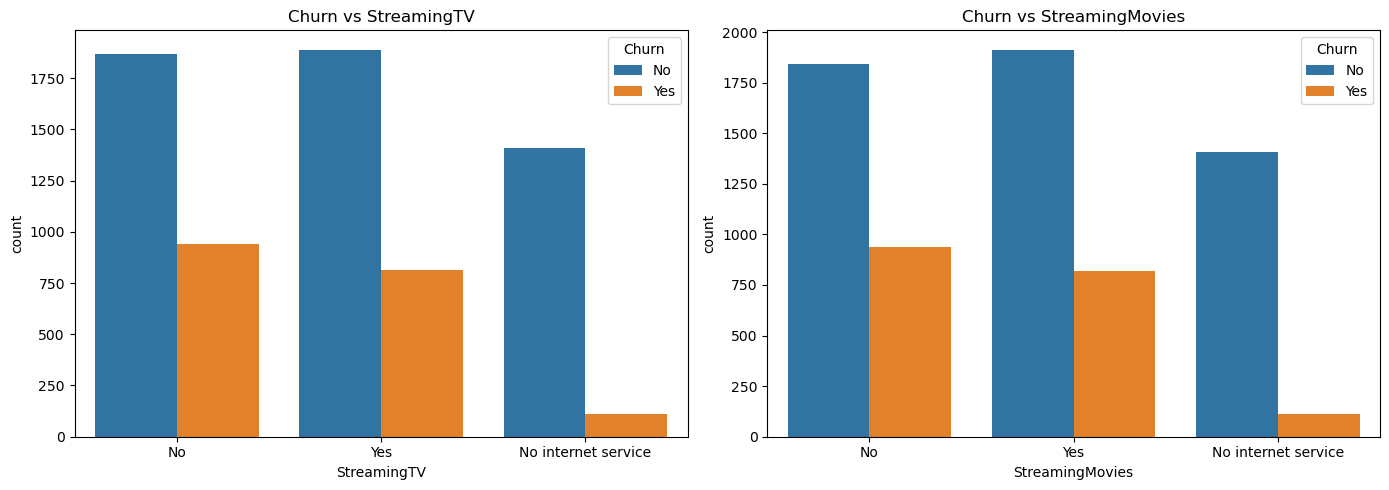

In [36]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=axes[0])
axes[0].set_title("Churn vs StreamingTV")

sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=axes[1])
axes[1].set_title("Churn vs StreamingMovies")

plt.tight_layout()
plt.show()

Customers who use Streaming TV or don’t use Streaming TV have a similar churn rate, meaning entertainment services do not significantly impact churn.

The same pattern is observed for Streaming Movies — churn remains almost the same whether they use the service or not.

Again, customers with No Internet Service show very low churn, which is consistent across other internet-related featur

<Axes: xlabel='Partner', ylabel='count'>

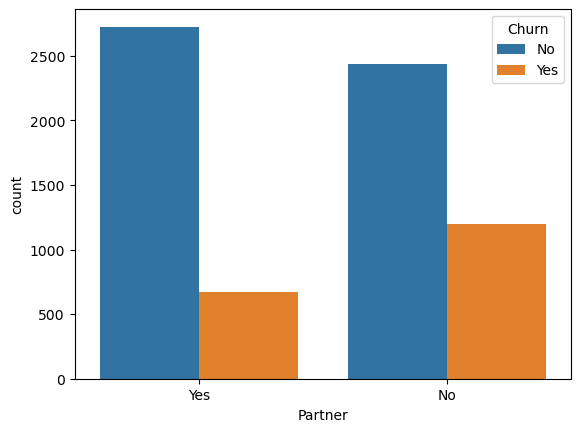

In [37]:
sns.countplot(data=df, x='Partner', hue='Churn')

Customers who have a partner churn less compared to those without a partner.

This suggests that partnered customers may be more stable in their plans and less likely to switch providers.

<Axes: xlabel='Dependents', ylabel='count'>

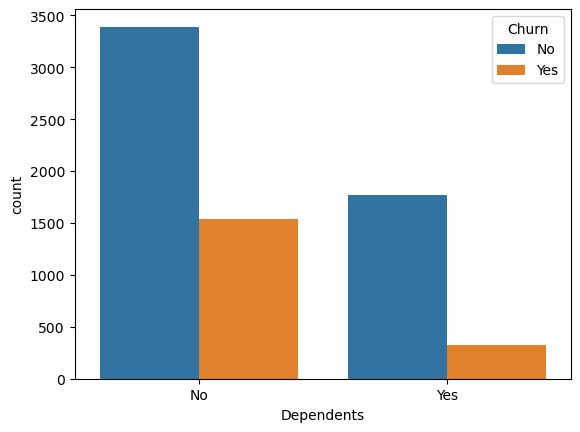

In [38]:
sns.countplot(data=df, x='Dependents', hue='Churn')

Customers with dependents show a significantly lower churn rate.

This may be because households with dependents rely more on consistent internet/telecom services and avoid disruptions, making them more loyal..

<Axes: xlabel='PaperlessBilling', ylabel='count'>

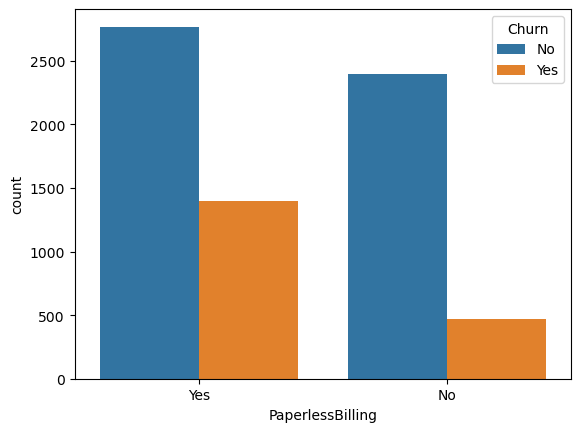

In [39]:
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')

Customers who do NOT use paperless billing churn less, whereas those with paperless billing churn more.
    
This indicates that paperless-billing customers may be more tech-savvy and also more price-sensitive, making them more likely to switch providers.

## Overall EDA Conclusion
- **Short-tenure customers are at the highest risk** — onboarding & early-stage retention are crucial.
- **Month-to-month customers** represent the biggest churn segment and need targeted offers.
- **Fiber optic users** churn more — could indicate dissatisfaction or pricing pain-point.
- **Security, backup, and support services** significantly reduce churn — improving service bundling may help.
- **Auto payment & long-term contracts** strongly reduce churn — promoting these can boost retention.
- **Demographics like partner/dependents** impact churn behavior, but service-related variables have stronger effects.

Overall, churn is driven more by **service quality, contract type, and value perception** rather than just customer demographics.



## Feature Engineering

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 non-nu

In [42]:
df.drop("customerID",axis=1,inplace=True)

In [43]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


In [44]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [45]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [46]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

In [47]:
df.drop("tenure_group",axis=1,inplace=True)

In [48]:
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [49]:
multi_value_cols = [
    'OnlineSecurity','OnlineBackup','DeviceProtection','InternetService',
    'Contract','PaymentMethod','MultipleLines',"TechSupport","StreamingTV","StreamingMovies"
]

In [50]:
binary_cols = [
    'Partner','Dependents',
    'PhoneService','PaperlessBilling'
]

In [51]:
df = pd.get_dummies(df, columns=multi_value_cols, drop_first=True,dtype=int)

In [52]:
for col in binary_cols:
    df[col] = df[col].map({'Yes':1,'No':0})

In [53]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,AvgMonthlySpend
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,0,0,0,0,0,14.925000
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,0,0,0,0,0,53.985714
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,0,0,0,0,36.050000
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,0,1,0,0,0,0,40.016304
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,0,50.550000


In [55]:
df.isnull().sum().sum()

np.int64(0)

## Feature Engineering

- **Target Encoding:** 'Churn' converted to 1 (Yes) / 0 (No)
- **Binary Columns (Label Encode 1/0):** Partner, Dependents, PhoneService, PaperlessBilling, gender
- **Multi-Category Columns (One-Hot Encode):** OnlineSecurity, OnlineBackup, DeviceProtection, InternetService, Contract, PaymentMethod, MultipleLines,     TechSupport, StreamingTV, StreamingMovies,
- **Numeric Columns:** tenure, MonthlyCharges, TotalCharges, AvgMonthlySpend (derived as TotalCharges / (tenure + 1))
- **Dropped Columns:** customerID, tenure_group (tenure_group used only for EDA)
- **Dataset is now fully numeric and ready for ML**


## Feature Selection

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [57]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [59]:
num_cols = ['tenure','MonthlyCharges','TotalCharges','AvgMonthlySpend']

In [60]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [61]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [62]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


<Axes: xlabel='Importance', ylabel='Feature'>

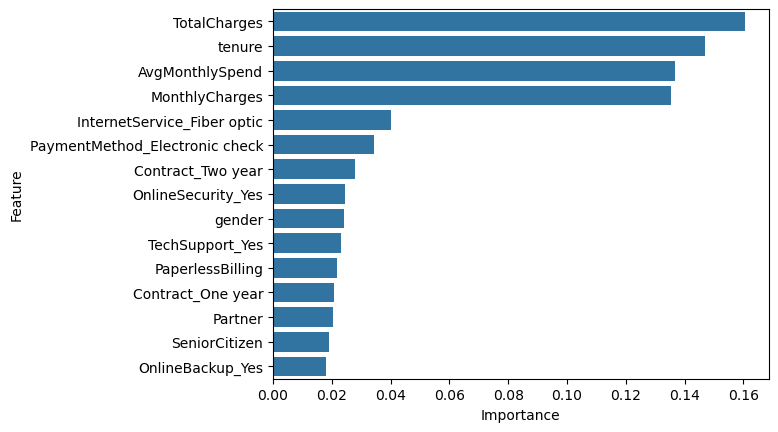

In [63]:
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))

In [64]:
feature_importances

,Feature,Importance
8,TotalCharges,0.160637
4,tenure,0.146872
30,AvgMonthlySpend,0.136701
7,MonthlyCharges,0.135292
15,InternetService_Fiber optic,0.040045
20,PaymentMethod_Electronic check,0.034411
18,Contract_Two year,0.027923
10,OnlineSecurity_Yes,0.024475
0,gender,0.024200
25,TechSupport_Yes,0.023000


In [82]:
top_features = feature_importances['Feature'].head(15).tolist()
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
X_train_selected.columns

Index(['TotalCharges', 'tenure', 'AvgMonthlySpend', 'MonthlyCharges',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'Contract_Two year', 'OnlineSecurity_Yes', 'gender', 'TechSupport_Yes',
       'PaperlessBilling', 'Contract_One year', 'Partner', 'SeniorCitizen',
       'OnlineBackup_Yes'],
      dtype='object')

## Feature Selection

- **Method Used:** Tree-based feature selection using RandomForestClassifier
- **Why:** Handles mix of numeric and one-hot features, captures non-linear relationships, and identifies the most important features for churn prediction
- **Process:**
  1. Fit RandomForest on the training set
  2. Compute feature importances
  3. Select **top 15 features** based on importance
- **Top Features Selected:** 
  TotalCharges, tenure, MonthlyCharges, AvgMonthlySpend, TechSupport, InternetService_Fiber optic,
  PaymentMethod_Electronic check, Contract_Two year, gender, OnlineSecurity_Yes, Contract_One year, 
  PaperlessBilling, Partner, SeniorCitizen, StreamingTV
- **Result:** Dataset reduced to top 15 features, ready for modeling.  


## Model Selection

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [67]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [68]:
results = []
for name, model in models.items():
    model.fit(X_train_selected, y_train)                    
    y_pred = model.predict(X_test_selected)                 
    y_prob = model.predict_proba(X_test_selected)[:,1]      
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    })

In [69]:
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.796020,0.653710,0.494652,0.563166,0.831165
1,Random Forest,0.791045,0.641844,0.483957,0.551829,0.822287
2,XGBoost,0.772566,0.587097,0.486631,0.532164,0.809271


## Model Selection Overview

- **Models Trained:** Logistic Regression, Random Forest, XGBoost
- **Evaluation Metrics Used:** Accuracy, Precision, Recall, F1-Score, ROC-AUC
- **Results Overview:**
    - Logistic Regression: Accuracy = 0.796, ROC-AUC = 0.831
    - Random Forest: Accuracy = 0.783, ROC-AUC = 0.821
    - XGBoost: Accuracy = 0.772, ROC-AUC = 0.809
- **Best Model Selected:** **Logistic Regression**
- **Reason:** Highest ROC-AUC and strong overall metrics; simple and best.


## Hyperparameter Tuning On Best Model

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [1000]
}
logreg = LogisticRegression(random_state=42)

In [72]:
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [73]:
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='roc_auc', verbose=1)

In [74]:
grid_search.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}

In [75]:
grid_search.best_score_

np.float64(0.8459392486658516)

## Hyperparameter Tuning & Final Model
- **Model:** Logistic Regression  
- **Hyperparameter Tuning:** GridSearchCV with 5-fold cross-validation  
- **Parameters Tuned:** penalty, C, solver, max_iter 
- **Scoring Metric:** ROC-AUC (best for imbalanced churn data)  

### Best Parameters Found:
- `C`: 10  
- `penalty`: 'l2'  
- `solver`: 'saga'  
- `max_iter`: 1000 

## Training Model With Best Parameter

In [76]:
bestlog = LogisticRegression(C =  10, max_iter =  1000, penalty= 'l2', solver= 'saga')
bestlog.fit(X_train_selected,y_train)

LogisticRegression(C=10, max_iter=1000, solver='saga')

In [77]:
y_pred = bestlog.predict(X_test_selected)
y_prob = bestlog.predict_proba(X_test_selected)[:,1]

In [78]:
accuracy_score(y_test, y_pred)

0.7938877043354655

In [79]:
roc_auc_score(y_test, y_prob)

np.float64(0.8311625451025257)

## Final Model Training Summary

- **Model Selected:** Logistic Regression  
- **Reason:** Highest ROC-AUC (0.83) and strong overall metrics among trained models  

## Customer Churn Prediction Project Summary

### Objective:
Predict which customers are likely to churn using customer data.

### Dataset:
- 7000 customers approx
- Features include demographics, services, billing info, contracts  
- Target variable: Churn

### Steps Taken:

1. **Exploratory Data Analysis (EDA):**
   - Analyzed churn distribution, tenure, charges, contract types, internet services  
   - Visualized relationships to extract actionable insights  

2. **Data Cleaning & Feature Engineering:**
   - Handled missing values and converted TotalCharges to numeric  
   - Derived feature: AvgMonthlySpend = TotalCharges / (tenure + 1)  
   - Encoded categorical features (one-hot for multi-category, 0/1 for binary
   -    - Scaled numeric features, handled imbalanced data carefully  

3. **Feature Selection:**
   - Used RandomForestClassifier to select **top 15 most important features**  
   - Reduced dimensionality, improved model efficiency  

4. **Model Training & Evaluation:**
   - Trained Logistic Regression, RandomForest, XGBoost  
   - Selected **Logistic Regression** as best based on ROC-AUC (0.83)
     
5. **Hyperparameter Tuning:**
   - Used GridSearchCV (5-fold CV)  
   - Best parameters: C=10, penalty='l2', solver='saga', max_iter=1000  
   - Improved predictive performance  

### Results:
- Accuracy: 79%  
- ROC-AUC: 0.83  
- Model interpretable, ready for deployment or app integration  

### Insights & Impact:
- Customers with **short tenure, high monthly charges, month-to-month contracts** are more likely to churn  
- **Fiber optic internet users** and those **without tech support** show higher churn rates  
- Derived features like **AvgMonthlySpend** helped normalize billing behavior for better prediction


In [80]:
import pickle
with open('logreg_churn_model.pkl', 'wb') as file:
    pickle.dump(bestlog, file)

In [81]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']